In [313]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt
warnings.simplefilter(action = "ignore")
sns.set(style="white")

In [77]:
data = pd.read_csv('data/churn_prediction.csv')

In [78]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [79]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [81]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors = 'coerce')

In [82]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [83]:
data.dropna(inplace = True)

### Visualization

In [ ]:
def stacked_graph(data, feature):
    phone_service = data.groupby([feature, 'Churn']).size().unstack()
    phone_service = phone_service.div(phone_service.sum(axis = 1), axis = 0) * 100
    phone_service.reset_index(inplace = True)
    phone_service.plot(x = feature, kind = 'barh', stacked = True)
    plt.xlabel('percent')
    plt.ylabel(feature)
    plt.show()

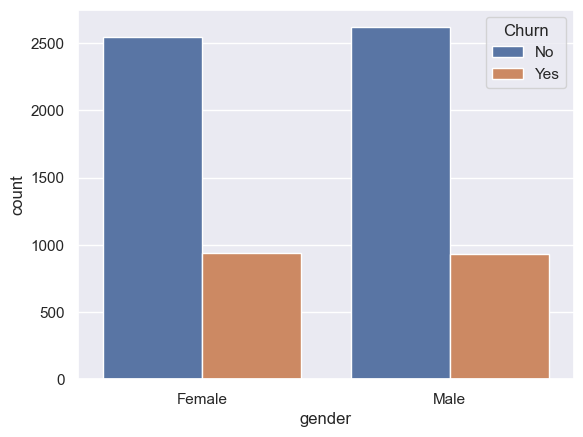

In [189]:
sns.countplot(x = data['gender'], hue = data['Churn'])
plt.show()

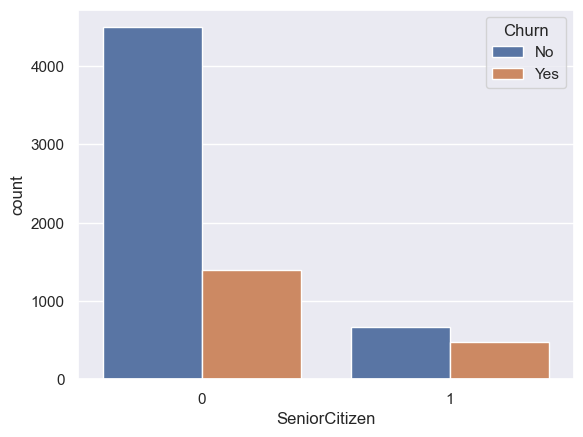

In [192]:
sns.countplot(x = data['SeniorCitizen'], hue = data['Churn'])
plt.show()

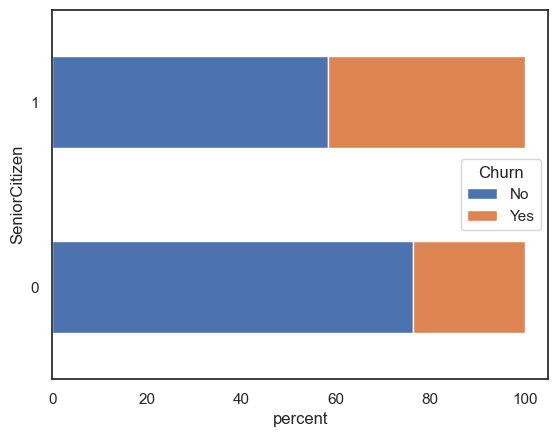

In [413]:
stacked_graph(data, 'SeniorCitizen')

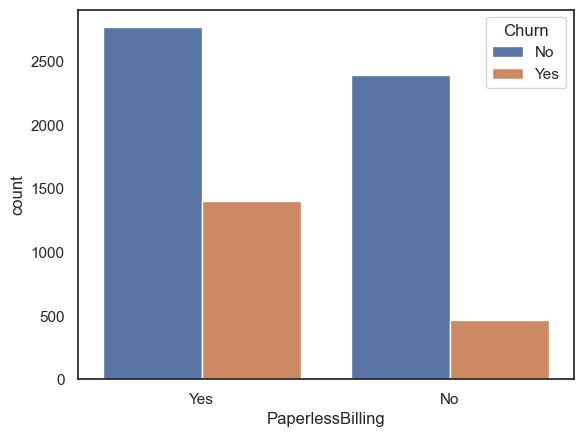

In [380]:
sns.countplot(x = data['PaperlessBilling'], hue = data['Churn'])
plt.show()

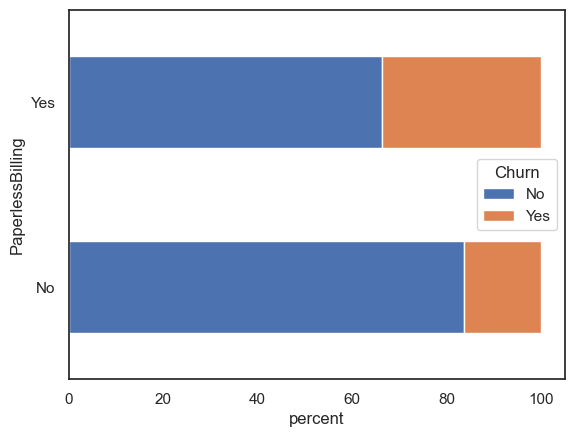

In [414]:
stacked_graph(data, 'PaperlessBilling')

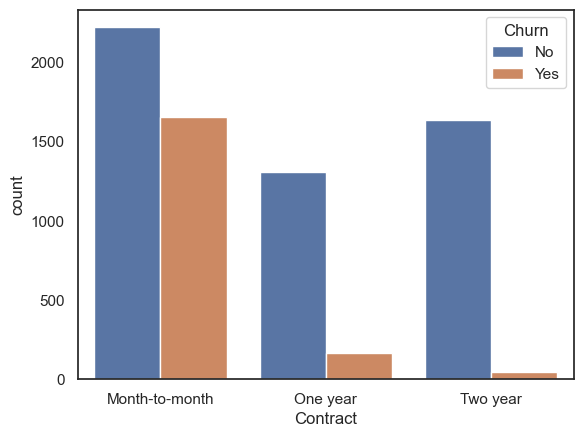

In [382]:
sns.countplot(x = data['Contract'], hue = data['Churn'])
plt.show()

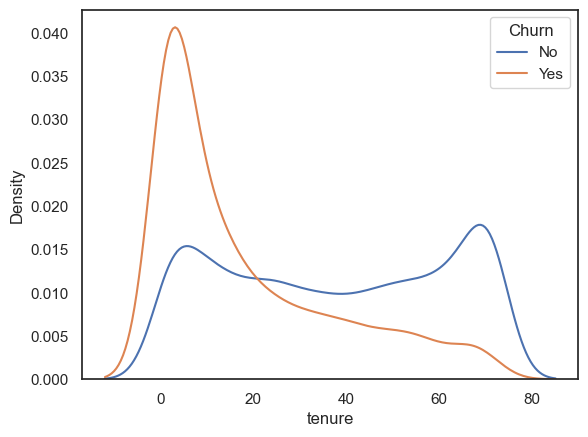

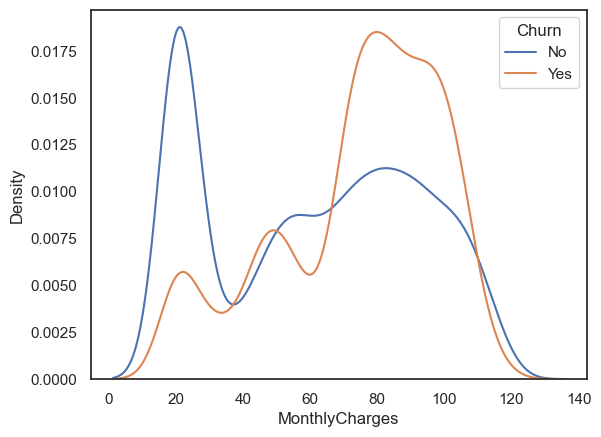

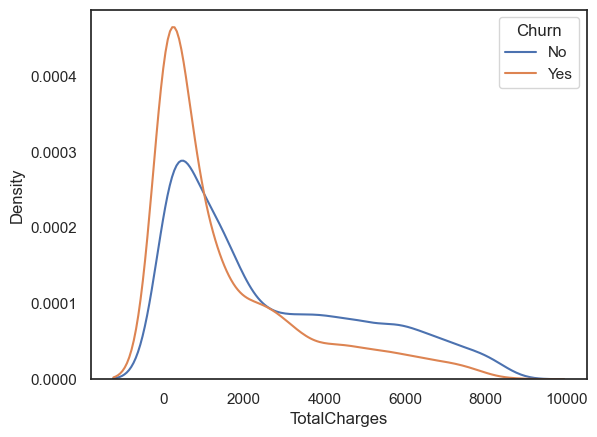

In [167]:
features = ['tenure', 'MonthlyCharges', 'TotalCharges']
for feature in features:
    sns.kdeplot(x = data[data["Churn"]=='No'][feature],hue = 'Churn', data = data, label = 'No Churn')
    sns.kdeplot(x = data[data["Churn"]=='Yes'][feature],hue = 'Churn', data = data, label = 'Churn')
    plt.show()

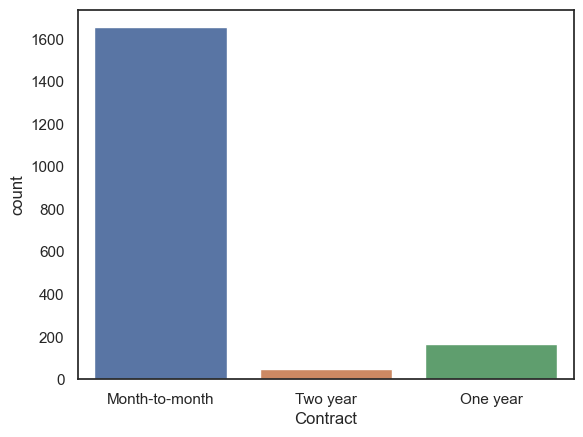

In [163]:
sns.countplot(x = data[data['Churn'] == 'Yes']['Contract'])
plt.show()

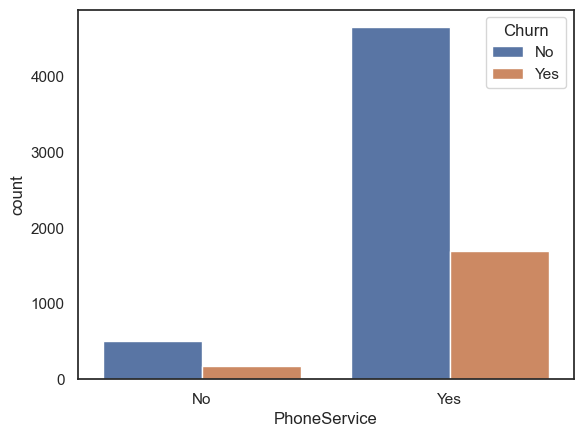

In [385]:
sns.countplot(x = data['PhoneService'], hue = data['Churn'])
plt.show()

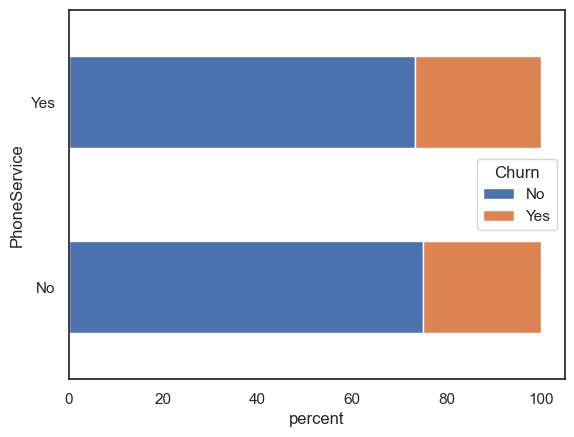

In [415]:
stacked_graph(data, 'PhoneService')

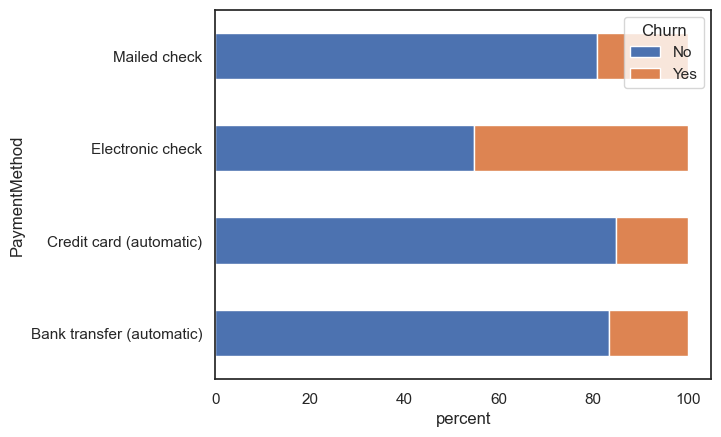

In [416]:
stacked_graph(data, 'PaymentMethod')

In [ ]:
data['PhoneService'].unique()

In [383]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [161]:
data['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [74]:
data.drop(['customerID'], axis = 1, inplace = True)

data['gender'] = data['gender'].replace('Female', 1)
data['gender'] = data['gender'].replace('Male', 0)

data['Partner'] = data['Partner'].replace('Yes', 1)
data['Partner'] = data['Partner'].replace('No', 0)

data['Dependents'] = data['Dependents'].replace('Yes', 1)
data['Dependents'] = data['Dependents'].replace('No', 0)

data['PhoneService'] = data['PhoneService'].replace('Yes', 1)
data['PhoneService'] = data['PhoneService'].replace('No', 0)

data['PaperlessBilling'] = data['PaperlessBilling'].replace('Yes', 1)
data['PaperlessBilling'] = data['PaperlessBilling'].replace('No', 0)

data['Churn'] = data['Churn'].replace('Yes', 1)
data['Churn'] = data['Churn'].replace('No', 0)

In [75]:
data.head(100)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0,0,0,12,1,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,1,Electronic check,78.95,927.35,1
96,0,0,1,1,71,1,Yes,DSL,Yes,Yes,No,Yes,No,No,One year,1,Credit card (automatic),66.85,4748.70,0
97,0,0,0,0,5,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,0,Mailed check,21.05,113.85,1
98,0,0,0,0,52,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0,Bank transfer (automatic),21.00,1107.20,0


In [61]:
data['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)